#### Importing packages



In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#### Loading the Data Set



In [3]:
filename = os.path.join(os.getcwd(), "data", "adultData.csv")
df = pd.read_csv(filename, header = 0)

### Exploratory Data Analysis


* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* addressing class imbalance in data sample to promote fair AI


In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32399 non-null  float64
 1   workclass       30725 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  int64  
 5   marital-status  32561 non-null  object 
 6   occupation      30718 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex_selfID      32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32236 non-null  float64
 13  native-country  31978 non-null  object 
 14  income_binary   32561 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB


In [7]:
# identifying columns with missing data 
df.isnull().sum()

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [8]:
df.describe(include = 'all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
count,32399.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32236.000000,31978,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.589216,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,615.907773,87.303830,40.450428,NaN,NaN
std,13.647862,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,2420.191974,402.960219,12.353748,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [9]:
df.rename(columns={'capital-gain': 'capital gain', 
                   'capital-loss': 'capital loss', 
                   'native-country': 'country',
                   'hours-per-week': 'hours per week',
                   'marital-status': 'marital', 
                   'income_binary': 'income',
                  'sex_selfID': 'sex'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

In [10]:
# check for nan values
df.isnull().sum()

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital              0
occupation        1843
relationship         0
race                 0
sex                  0
capital gain         0
capital loss         0
hours per week     325
country            583
income               0
dtype: int64

In [11]:
df.dropna(how='any',inplace=True)
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital           0
occupation        0
relationship      0
race              0
sex               0
capital gain      0
capital loss      0
hours per week    0
country           0
income            0
dtype: int64

In [12]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- age ---
36.0    842
31.0    840
33.0    828
34.0    826
37.0    814
       ... 
84.0      7
83.0      5
88.0      3
85.0      3
86.0      1
Name: age, Length: 72, dtype: int64
---- workclass ---
Private             21949
Self-emp-not-inc     2470
Local-gov            2041
State-gov            1259
Self-emp-inc         1061
Federal-gov           922
Without-pay            14
Name: workclass, dtype: int64
---- fnlwgt ---
203488    13
148995    12
164190    12
121124    12
123011    12
          ..
261497     1
364958     1
172370     1
168276     1
145522     1
Name: fnlwgt, Length: 20049, dtype: int64
---- education ---
HS-grad         9704
Some-college    6567
Bachelors       4973
Masters         1607
Assoc-voc       1285
11th            1033
Assoc-acdm       993
10th             804
7th-8th          546
Prof-school      536
9th              448
Doctorate        372
12th             371
5th-6th          283
1st-4th          149
Preschool         45
Name: education, dtype: int64
--

In [13]:
#dropping noisy data 
df.drop(['education-num','age', 'hours per week', 'fnlwgt', 'capital gain','capital loss', 'country'], axis=1, inplace=True)

In [14]:
# mapping categorical data to numerical values

df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

df['sex'] = df['sex'].map({'Non-Female': 0, 'Female': 1}).astype(int)

df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 'Amer-Indian-Inuit': 4}).astype(int)

df['marital'] = df['marital'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)

df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)

df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)

df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)

In [15]:
df.head()

,workclass,education,marital,occupation,relationship,race,sex,income
0,1,12,5,3,0,3,0,0
1,6,12,2,7,4,3,0,0
2,5,3,4,4,0,3,0,0
3,5,11,2,4,4,0,0,0
4,5,12,2,5,1,0,1,0


In [16]:
#creating a correlation matrix and retrieving the highest two correlated features with the income label
exclude = ['income']
corrs = df.corr()['income'].drop(exclude, axis = 0)
corrs_sorted = corrs.sort_values(ascending = False)
top_two_corr = list(corrs_sorted[:2].index)
top_two_corr

['relationship', 'education']

Text(0, 0.5, 'income')

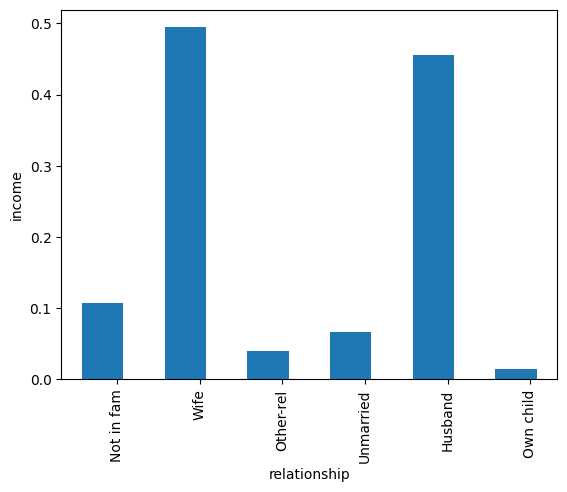

In [17]:
rels = ["Not in fam", "Wife", "Other-rel", "Unmarried","Husband","Own child"]

rg= np.arange(6)
width = 0.35

df.groupby('relationship').income.mean().plot(kind='bar')
plt.xticks(rg + width/2, rels)
plt.ylabel("income")

Text(0, 0.5, 'income')

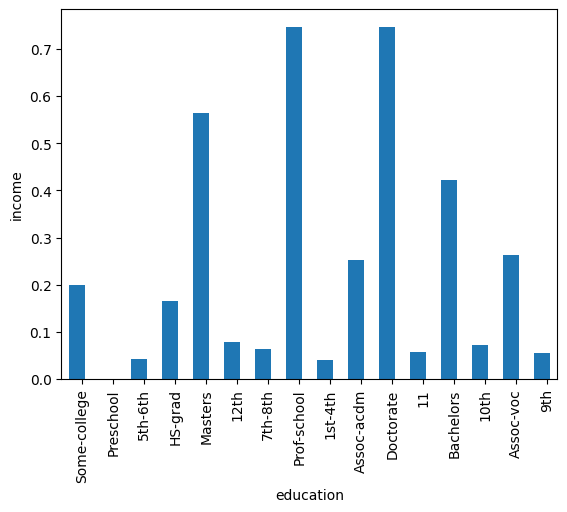

In [18]:
edu = ["Some-college", "Preschool", "5th-6th", "HS-grad", "Masters", "12th", "7th-8th", "Prof-school", "1st-4th", "Assoc-acdm", "Doctorate", "11","Bachelors", "10th","Assoc-voc","9th"]
rg= np.arange(16)
width = 0.35

df.groupby('education').income.mean().plot(kind='bar')
plt.xticks(rg + width/2, edu)
plt.ylabel("income")

Text(0, 0.5, 'income')

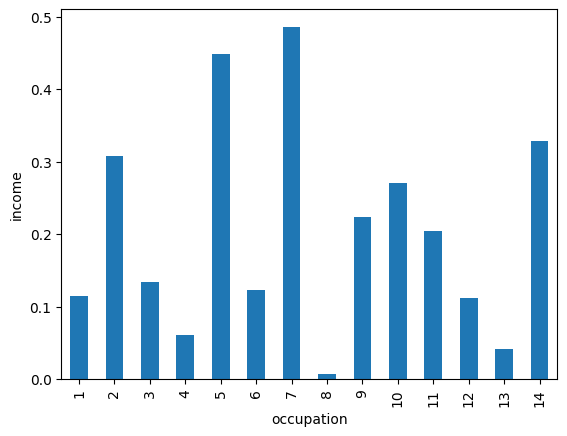

In [19]:
df.groupby('occupation').income.mean().plot(kind='bar')
plt.ylabel("income")

Text(0, 0.5, 'income')

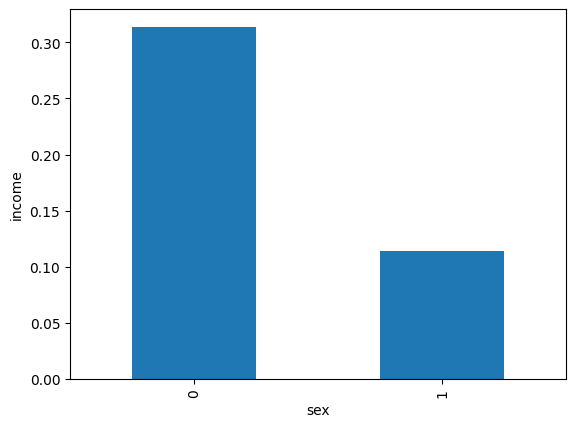

In [20]:
df.groupby('sex').income.mean().plot(kind='bar')
plt.ylabel("income")

Text(0, 0.5, 'income')

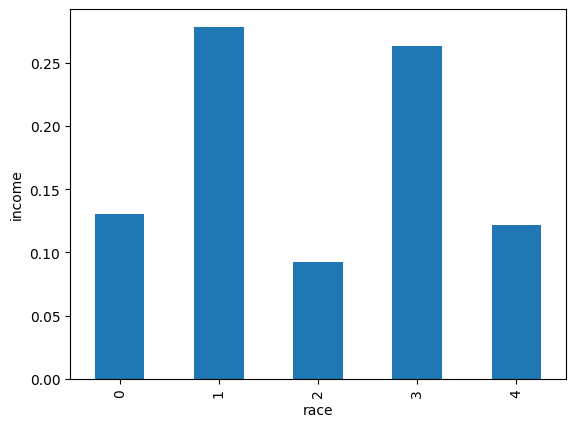

In [21]:
df.groupby('race').income.mean().plot(kind='bar')
plt.ylabel("income")

Text(0, 0.5, 'income')

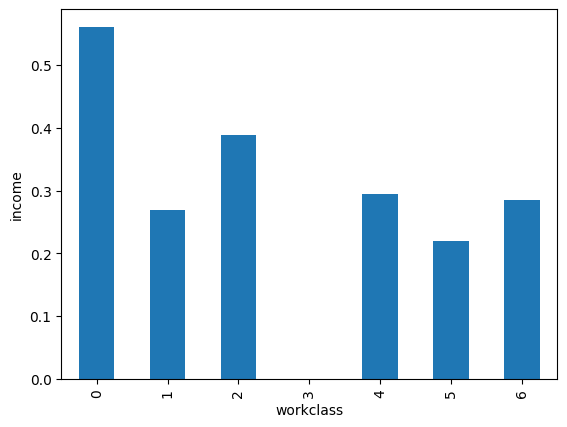

In [22]:
df.groupby('workclass').income.mean().plot(kind='bar')
plt.ylabel("income")

## Analysis

Upon exploration of the data, it appears people with professional or executive/managerial occupations tend to have higher incomes over 50K. The gender feature indicates that men are more likely than women to earn over 50K. Married couples, with the husband or wife as primarybreadwinners, tend to have incomes above 50K. Asians, Pacific Islanders, and Whites have greater odds of earning more than 50K compared to other races.Those who are self-employed or work for the federal government are more likely to earn over 50K.


1. Preparing data for model and creating features and a label.
2. Fitting model to the training data and evaluating your model.
3. Improving your model by performing model selection and/or feature selection techniques to find best model for the problem.


In [23]:
# creating labeled examples
y = df['income']
X = df.drop('income', axis = 1)

In [24]:
# splitting examples into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1234)

In [25]:
# fitting a logistic regression model with default hyperparameter values
model_default = LogisticRegression(max_iter=1000)
model_default.fit(X_train, y_train)

proba_predictions = model_default.predict_proba(X_test)
proba_predictions_default = []

for i in proba_predictions:
    proba_predictions_default.append(i[1])
    
class_label_predictions_default = model_default.predict(X_test)

# <=50K': 0, '>50K': 1

c_m = confusion_matrix(y_test, class_label_predictions_default, labels=[True, False])
pd.DataFrame(c_m,
             columns=['Predicted: <=50K', 'Predicted: >50K'],
             index=['Actual: <=50K', 'Actual: >50K'])

,Predicted: <=50K,Predicted: >50K
Actual: <=50K,496,1673
Actual: >50K,497,6249


In [26]:
from sklearn.svm import l1_min_c
cs = l1_min_c(X_train, y_train, loss="log") * np.logspace(0, 7, 16)
param_grid = dict(C = list(cs))
param_grid

{'C': [2.547219073576423e-05,
  7.459899294739322e-05,
  0.0002184739352218995,
  0.0006398325028999017,
  0.0018738419818883588,
  0.005487817135223925,
  0.01607186582473077,
  0.04706878249098388,
  0.13784773400574749,
  0.4037070169418378,
  1.182314360867782,
  3.4625785266337914,
  10.140661781614094,
  29.69839400842699,
  86.97604019087842,
  254.7219073576423]}

In [27]:
# performing param grid search
print('Running Grid Search. . .')

model = LogisticRegression(max_iter=1000)
grid = GridSearchCV(model, param_grid, cv=5)
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search. . .
Done


In [28]:
best_C = grid_search.best_params_['C']
best_C

3.4625785266337914

In [29]:
# fitting and evaluating optimal logistic regression model
model_best = LogisticRegression(C = best_C, max_iter=1000)
model_best.fit(X_train, y_train)

proba_predictions = model_best.predict_proba(X_test)
proba_predictions_best = []

for i in proba_predictions:
    proba_predictions_best.append(i[1])

class_label_predictions_best = model_best.predict(X_test)

c_m = confusion_matrix(y_test, class_label_predictions_best, labels=[True, False])

# <=50K': 0, '>50K': 1

pd.DataFrame(c_m,
             columns=['Predicted: <=50K', 'Predicted: >50K'],
             index=['Actual: <=50K', 'Actual: >50K'])


,Predicted: <=50K,Predicted: >50K
Actual: <=50K,496,1673
Actual: >50K,498,6248


In [30]:
# comparing prc for both models

precision_default, recall_default, thresholds_default = precision_recall_curve(y_test, proba_predictions_default)
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test, proba_predictions_best)

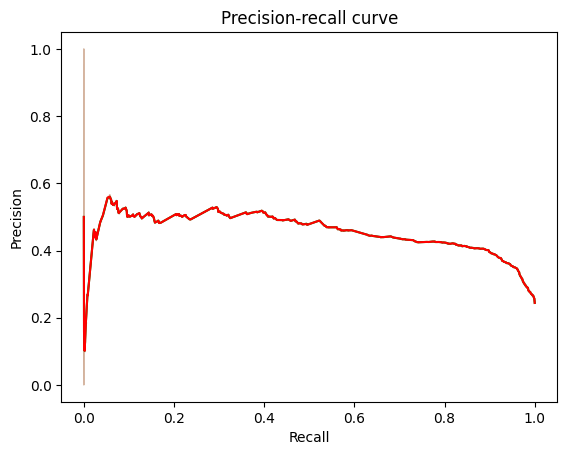

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(x=recall_default, y=precision_default, color='g')
sns.lineplot(x=recall_best, y=precision_best, color='r')
plt.title("Precision-recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [32]:
# plotting roc and computing auc
fpr_default, tpr_default, thresholds_default = roc_curve(y_test,proba_predictions_default)
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, proba_predictions_best)

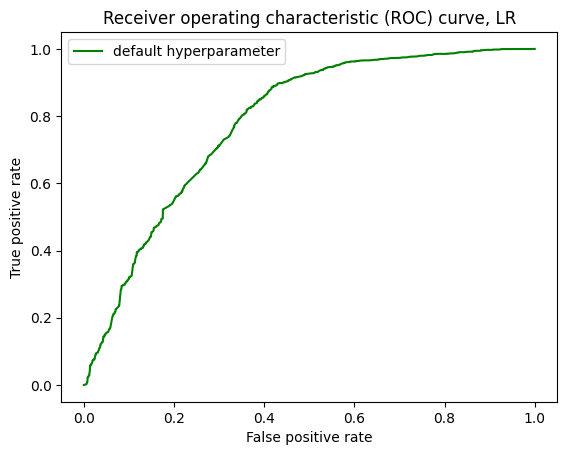

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(x=fpr_default, y=tpr_default, color='g')
plt.title("Receiver operating characteristic (ROC) curve, LR")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['default hyperparameter'])
plt.show()

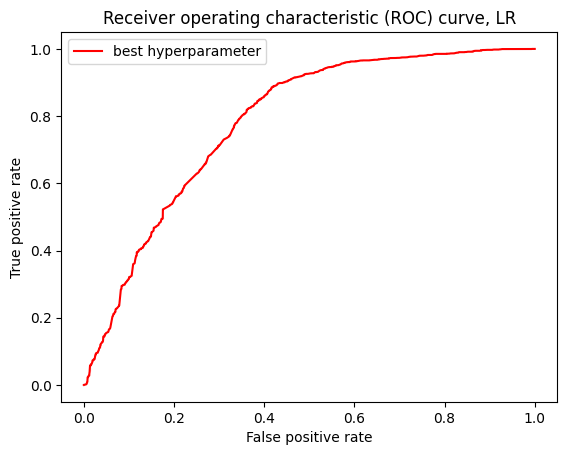

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(x=fpr_best, y=tpr_best, color='r')
plt.title("Receiver operating characteristic (ROC) curve, LR")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['best hyperparameter'])
plt.show()

In [35]:
auc_default = auc(fpr_default, tpr_default)
auc_best = auc(fpr_best, tpr_best)

print(auc_default)
print(auc_best)

0.781789512546205
0.7818042062936533


In [36]:
# feature selection

selector = SelectKBest(f_classif, k=5)
selector.fit(X, y)
filter = selector.get_support()
top_5_features = X.columns[filter]
print("Best 5 features:")
print(top_5_features)


new_X_train = X_train[top_5_features]
new_X_test = X_test[top_5_features]

model = LogisticRegression(C = best_C, max_iter=10000)
model.fit(new_X_train, y_train)

pp = model.predict_proba(new_X_test)
proba_predictions = []
for i in pp:
    proba_predictions.append(i[1])


fpr, tpr, thresholds = roc_curve(y_test, proba_predictions)
auc_result = auc(fpr, tpr)
print(auc_result)

Best 5 features:
Index(['workclass', 'education', 'marital', 'relationship', 'sex'], dtype='object')
0.777768722328769


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f7069b86-2cd8-4f5b-8b28-c3f622f89c3b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>